# Character Shifts in Harry Potter Fanfics

# Shifts with Residuals

### Last updated: 19.01.2022

# 0. Preliminaries

Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import math

In [2]:
path_data = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\data'
path_corpora = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\corpora'
path_pickled = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\pickled'
path_cooccurrences = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\cooccurrences'

# 1. Character Distribution

## 1.1 Threshold

Get characters

In [147]:
cooc_ff      = pd.DataFrame(pd.read_csv(path_cooccurrences + '\\cooccurrences_ffs_rel_df_sentences.csv', delimiter=";")).set_index("Unnamed: 0")
cooc_orig    = pd.DataFrame(pd.read_csv(path_cooccurrences + '\\cooccurrences_originals_rel_df_sentences.csv', delimiter=";")).set_index("Unnamed: 0")
cols = cooc_ff.keys().values
df = pd.DataFrame(index=cols,columns=cols)

In [148]:
sorted_ffs = pd.DataFrame(pd.read_csv(path_cooccurrences + '\\sorted_ffs.csv', delimiter=";"))

Define threshold x of residual value (>= |x|)

In [149]:
threshold = 0.5

Get characters with at least one residual value above threshold

In [150]:
thresh_list = []
for key1 in cols:
    for key2 in cols:
        if not key1 == "sum" and not key2 == "sum":
            obs = cooc_ff[key1][key2]
            exp = cooc_orig[key1][key2]

            try:
                if exp == 0:
                    df.at[key2, key1] = obs
                    cooc_ff.at[key2, key1] = obs
                else:
                    value = (obs - exp)  / math.sqrt(exp)
                    df.at[key2, key1] = value
                    cooc_ff.at[key2, key1] = value
                    if value <= -threshold or value >= threshold:
                        thresh_list.append(key1)
                        thresh_list.append(key2)
            except:
                df.at[key2, key1] = 0
                cooc_ff.at[key2, key1] = 0

thresh_list = list(set(thresh_list))
print(thresh_list)
print(cooc_ff.loc[thresh_list, thresh_list].sum())
print("Sum: " + str(cooc_ff.loc[thresh_list, thresh_list].sum().sum()))

['DRACO_MALFOY', 'SIRIUS_BLACK', 'SEVERUS_SNAPE', 'RON_WEALSEY', 'LUCIUS_MALFOY', 'JAMES_POTTER', 'LILY_POTTER', 'BLAISE_ZABINI', 'HERMINE_GRANGER', 'HARRY_POTTER', 'FRED_WEASLEY', 'ALBUS_DUMBLEDORE', 'VOLDEMORT', 'GEORGE_WEASLEY', 'RUBEUS_HAGRID']
DRACO_MALFOY        3.513151
SIRIUS_BLACK       -0.543614
SEVERUS_SNAPE       1.114856
RON_WEALSEY        -4.146574
LUCIUS_MALFOY       2.578746
JAMES_POTTER        1.690901
LILY_POTTER         1.898730
BLAISE_ZABINI       3.098619
HERMINE_GRANGER    -1.270849
HARRY_POTTER       -5.208761
FRED_WEASLEY       -1.741217
ALBUS_DUMBLEDORE   -2.492576
VOLDEMORT          -1.370866
GEORGE_WEASLEY     -1.664570
RUBEUS_HAGRID      -2.518812
dtype: float64
Sum: -7.062836694854969


Plot heatmap

In [151]:
thresh_df = pd.DataFrame(thresh_list, columns=['character_name'])
thresh_top_ffs = pd.merge(thresh_df, sorted_ffs, on=["character_name"])
thresh_top_ffs = thresh_top_ffs.sort_values(by=['relative_count'], ascending=False)
thresh_list = thresh_top_ffs['character_name'].tolist()

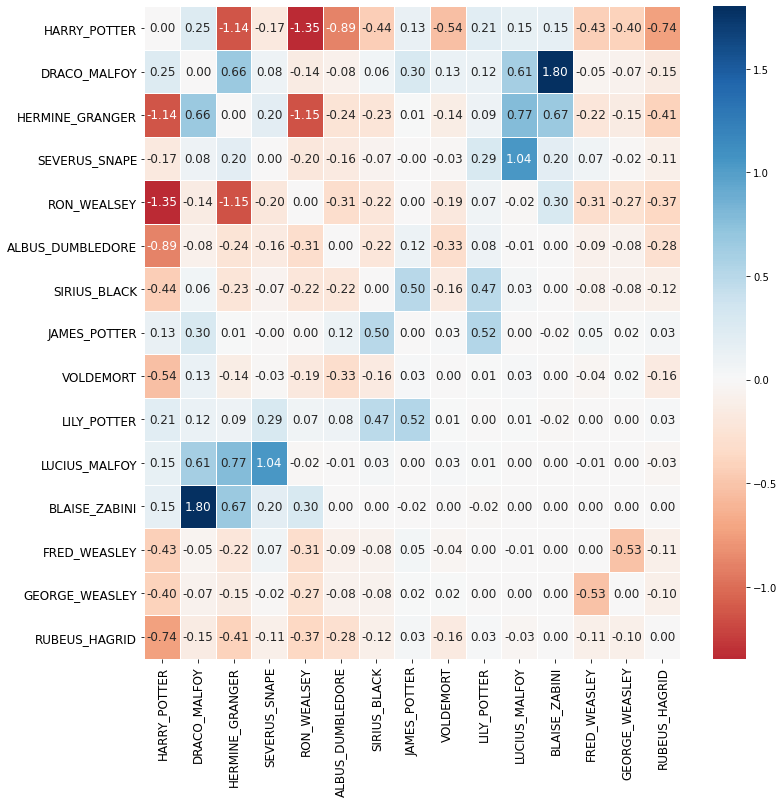

In [152]:
%matplotlib inline
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
heat = sns.heatmap(cooc_ff.loc[thresh_list, thresh_list], annot=True, linewidths=.5, ax=ax, fmt='.2f', annot_kws={"size": 12}, picker = 4,cmap = "RdBu", center = 0.00)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 12, rotation = 90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 12, rotation = 0)
plt.show()

fig.savefig(path_cooccurrences + '\\heatmap_shift.png', dpi=300, bbox_inches = 'tight')

## 1.2 List of characters

Get lists of characters for x- and y-axis

In [153]:
cooc_ff      = pd.DataFrame(pd.read_csv(path_cooccurrences + '\\cooccurrences_ffs_rel_df_sentences.csv', delimiter=";")).set_index("Unnamed: 0")
cooc_orig    = pd.DataFrame(pd.read_csv(path_cooccurrences + '\\cooccurrences_originals_rel_df_sentences.csv', delimiter=";")).set_index("Unnamed: 0")
Cols = ["HARRY_POTTER","RON_WEALSEY","HERMINE_GRANGER","ALBUS_DUMBLEDORE","RUBEUS_HAGRID","SEVERUS_SNAPE","VOLDEMORT","DRACO_MALFOY","SIRIUS_BLACK","REMUS_LUPIN","GINNY_WEASLEY","DOBBY","JAMES_POTTER","LILY_POTTER"]
Index = ["HARRY_POTTER","RON_WEALSEY","HERMINE_GRANGER","ALBUS_DUMBLEDORE","RUBEUS_HAGRID","SEVERUS_SNAPE","VOLDEMORT","DRACO_MALFOY","SIRIUS_BLACK","REMUS_LUPIN","GINNY_WEASLEY","DOBBY","JAMES_POTTER","LILY_POTTER"]
df = pd.DataFrame(index=Index, columns=Cols)
cooc = cooc_ff

Get residual values of character pairs (0 if not computable)

In [154]:
for key1 in Cols:
    for key2 in Index:
        if not key1 == "sum" and not key2 == "sum":
            obs = cooc_ff[key1][key2]
            exp = cooc_orig[key1][key2]

            try:
                if exp == 0:
                    df.at[key2, key1] = obs
                    cooc.at[key2, key1] = obs
                else:
                    value = (obs - exp)  / math.sqrt(exp)
                    df.at[key2, key1] = value
                    cooc.at[key2, key1] = value
            except:
                df.at[key2, key1] = 0
                cooc.at[key2, key1] = 0
                
print(cooc.loc[Index, Cols].sum())
print("Sum: " + str(cooc.loc[Index, Cols].sum().sum()))

HARRY_POTTER       -5.505971
RON_WEALSEY        -4.372775
HERMINE_GRANGER    -2.520726
ALBUS_DUMBLEDORE   -2.550120
RUBEUS_HAGRID      -2.426631
SEVERUS_SNAPE      -0.012694
VOLDEMORT          -1.482634
DRACO_MALFOY        1.550446
SIRIUS_BLACK       -0.207181
REMUS_LUPIN         0.347305
GINNY_WEASLEY       0.216032
DOBBY              -0.855041
JAMES_POTTER        2.120018
LILY_POTTER         2.527371
dtype: float64
Sum: -13.172599930910348


Plot heatmap

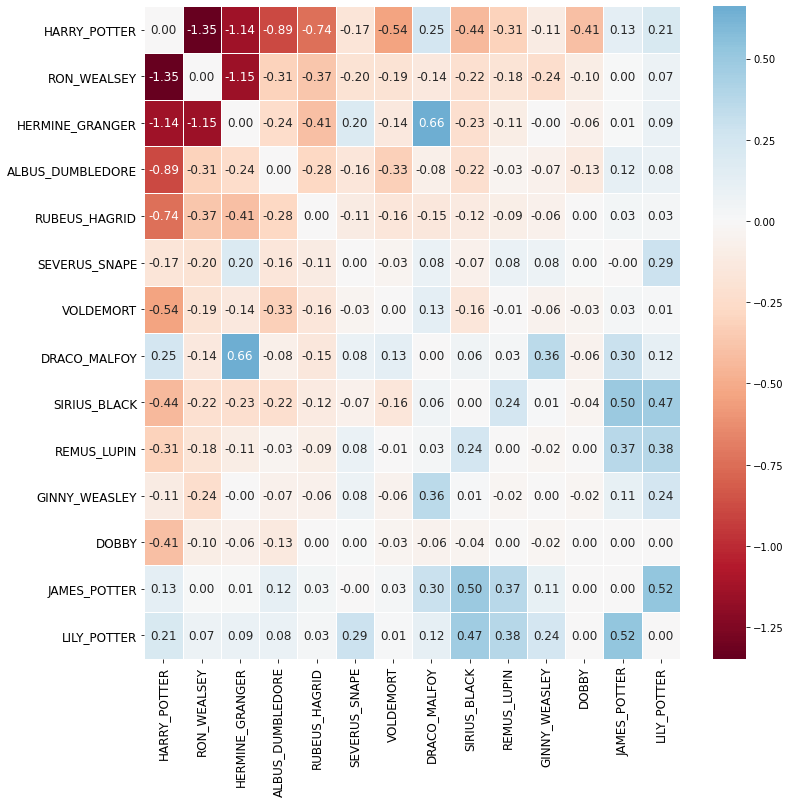

In [156]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 12))
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
heat = sns.heatmap(cooc.loc[Index, Cols], annot=True, linewidths=.5, ax=ax, fmt='.2f', annot_kws={"size": 12},cmap = "RdBu", center=0.00)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 12, rotation = 90)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 12, rotation = 0)
plt.show()

f.savefig(path_cooccurrences + '\\heatmap_shift_selected_characters.png', dpi=300, bbox_inches = 'tight')

# 2. Word Distribution

Define observed character pair

In [3]:
pair = ("HARRY_POTTER", "SEVERUS_SNAPE")

Find frequencies in folder

In [4]:
orig_path = path_cooccurrences + '\\cooccurring_words\\originals\\'
ff_path = path_cooccurrences + '\\cooccurring_words\\ffs\\'

In [5]:
    try:
        path = orig_path
        path += pair[0]
        path += "_"
        path += pair[1]
        path += "_fdist_verbs.csv"
        orig_freq = pd.read_csv(path)
    except:
        path = orig_path
        path += pair[1]
        path += r'_'
        path += pair[0]
        path += "_fdist_verbs.csv"
        orig_freq = pd.read_csv(path)

    try:
        path = ff_path
        path += pair[0]
        path += "_"
        path += pair[1]
        path += "_fdist_verbs.csv"
        ff_freq = pd.read_csv(path)
    except:
        path = ff_path
        path += pair[1]
        path += r'_'
        path += pair[0]
        path += "_fdist_verbs.csv"
        ff_freq = pd.read_csv(path)

Get dict for relative frequencies

In [6]:
orig_dict = orig_freq.set_index("term").to_dict("index")
ff_dict = ff_freq.set_index("term").to_dict("index")

Calculate pearson residuals for words

In [7]:
words = {}
for key in ff_dict.keys():
    if key in orig_dict.keys():
        words[key] = (ff_dict[key]["relative_frequency"] - orig_dict[key]["relative_frequency"]) / math.sqrt(orig_dict[key]["relative_frequency"])

Get Top20 words with tendency towards originals and towards FFs

In [8]:
words = dict(sorted(words.items(), key=lambda item: item[1]))
top20_above = list(words.items())[-20:]
top20_below = list(words.items())[:20]

Plot bars Top 20 shifts towards Fanfiction

In [11]:
df_above = pd.DataFrame({'pearson residual': [value for (_, value) in top20_above], 'lab': [word for (word, _) in top20_above]})
df_below = pd.DataFrame({'pearson residual': [value for (_, value) in top20_below], 'lab': [word for (word, _) in top20_below]})
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(top=0.99, bottom=0.1, hspace=0.3, wspace=0.4)
df_above.plot.bar(x='lab', y='pearson residual', rot=30, ax=axes[0], fontsize=14, color="blue", xlabel="")
df_below.plot.bar(x='lab', y='pearson residual', rot=30, ax=axes[1], fontsize=14, color="red", xlabel="")

axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

axes[0].legend(["pearson residual"], prop={'size': 16})
axes[1].legend(["pearson residual"], prop={'size': 16})

fig.savefig(path_cooccurrences + '\\word_dist_potter_snape.png', dpi=300, bbox_inches = 'tight')

In [12]:
words = {}
for key in ff_dict.keys():
    if key not in orig_dict.keys():
        words[key] = ff_dict[key]["relative_frequency"]
words_ff = dict(sorted(words.items(), key=lambda item: item[1]))
top20_above = list(words_ff.items())[-20:]

words = {}
for key in orig_dict.keys():
    if key not in ff_dict.keys():
        words[key] = orig_dict[key]["relative_frequency"]
words_orig = dict(sorted(words.items(), key=lambda item: item[1]))
top20_below = list(words_orig.items())[:20]

In [13]:
df_above = pd.DataFrame({'relative frequency': [value for (_, value) in top20_above], 'lab': [word for (word, _) in top20_above]})
df_below = pd.DataFrame({'relative frequency': [value for (_, value) in top20_below], 'lab': [word for (word, _) in top20_below]})
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(top=0.99, bottom=0.1, hspace=0.3, wspace=0.4)
df_above.plot.bar(x='lab', y='relative frequency', rot=30, ax=axes[0], fontsize=14, color="blue", xlabel="")
df_below.plot.bar(x='lab', y='relative frequency', rot=30, ax=axes[1], fontsize=14, color="red", xlabel="")

axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))

axes[0].legend(["relative frequency"], prop={'size': 16})
axes[1].legend(["relative frequency"], prop={'size': 16})

fig.savefig(path_cooccurrences + '\\word_dist_potter_snape_difference.png', dpi=300, bbox_inches = 'tight')